 # Loan prediction using machine learning

## importing required libraries ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_data=pd.read_csv("loan_train.csv")

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


 ## Data cleaning ##

In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data['Gender']= loan_data['Gender'].map({'Male':0, 'Female':1})
loan_data['Married']= loan_data['Married'].map({'No':0, 'Yes':1})
loan_data['Loan_Status']= loan_data['Loan_Status'].map({'N':0, 'Y':1})

In [8]:
loan_data["Gender"]=loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])

In [9]:
loan_data["Married"]=loan_data["Married"].fillna(loan_data["Married"].mode()[0])

In [10]:
loan_data["Dependents"]=loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])

In [11]:
loan_data["Self_Employed"]=loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])

In [12]:
loan_data["LoanAmount"]=loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mode()[0])

In [13]:
loan_data["Loan_Amount_Term"]=loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0])

In [14]:
loan_data["Credit_History"]=loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])

In [15]:
loan_data["Gender"].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

## Data visualisation ##

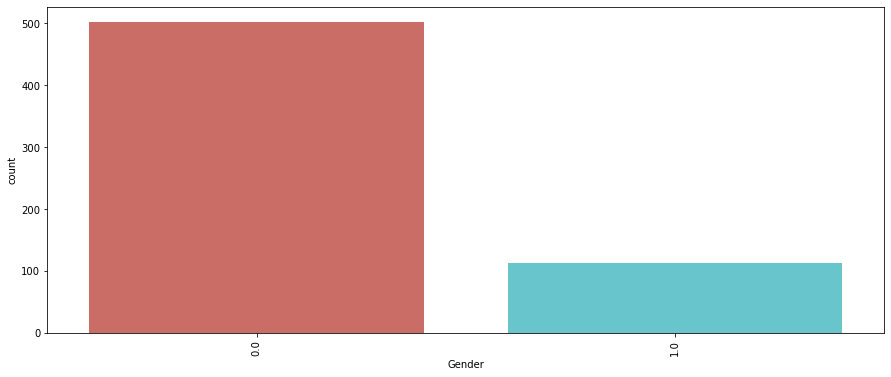

In [16]:
plt.figure(figsize=(15,6))
sns.countplot('Gender',data=loan_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [17]:
loan_data["LoanAmount"].value_counts()

120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [18]:
loan_data["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

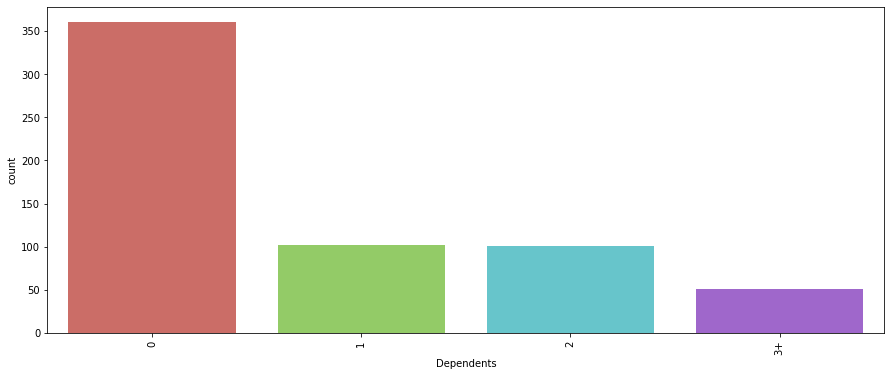

In [19]:
plt.figure(figsize=(15,6))
sns.countplot('Dependents',data=loan_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [20]:
loan_data["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

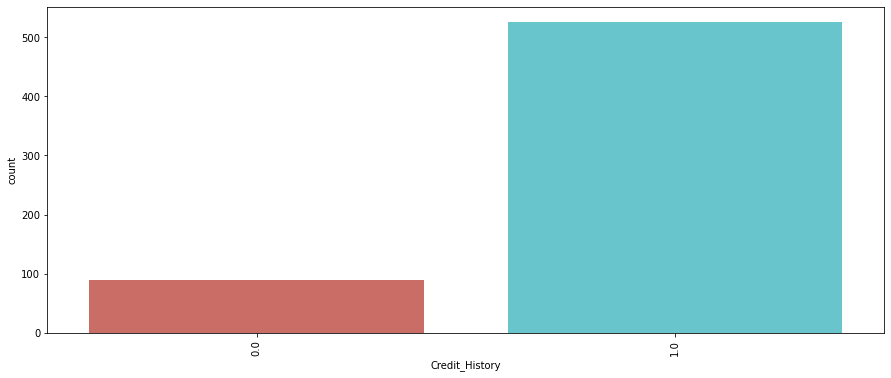

In [21]:
plt.figure(figsize=(15,6))
sns.countplot("Credit_History" ,data=loan_data , palette='hls')
plt.xticks(rotation=90)
plt.show()

In [22]:
 loan_data["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

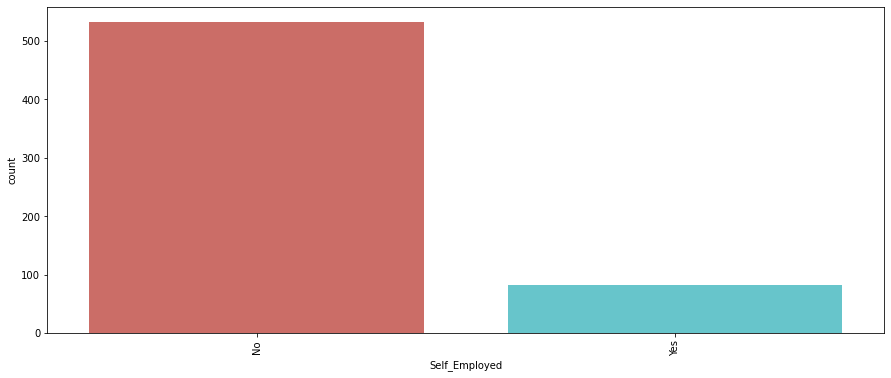

In [23]:
plt.figure(figsize=(15,6))
sns.countplot("Self_Employed", data=loan_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [24]:
loan_data["Loan_Amount_Term"].value_counts()


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

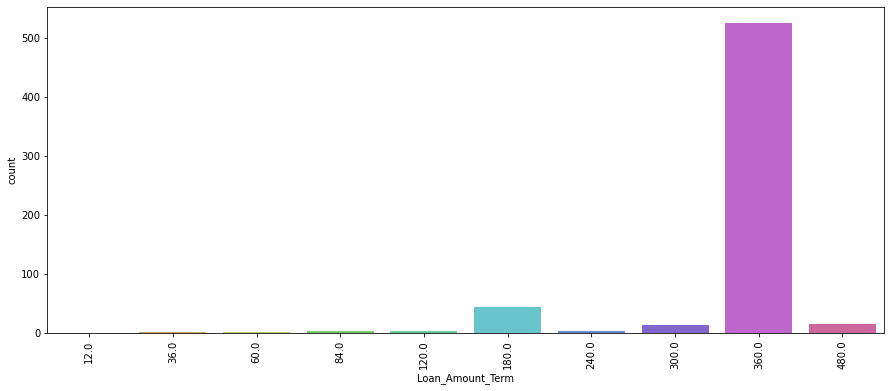

In [25]:
plt.figure(figsize=(15,6))
sns.countplot("Loan_Amount_Term", data=loan_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

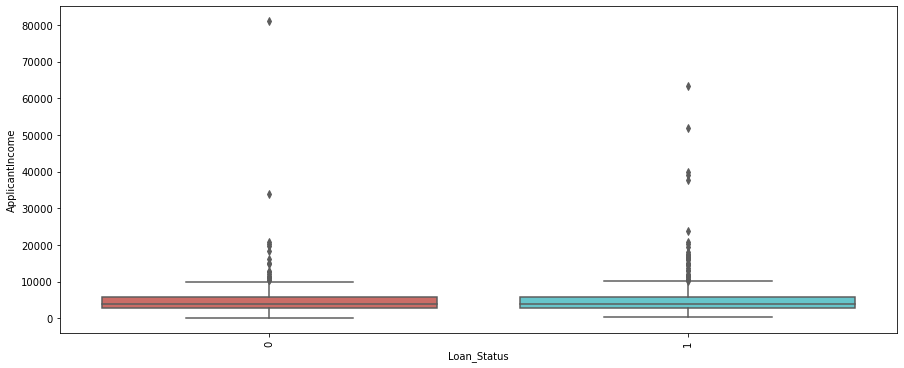

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=loan_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

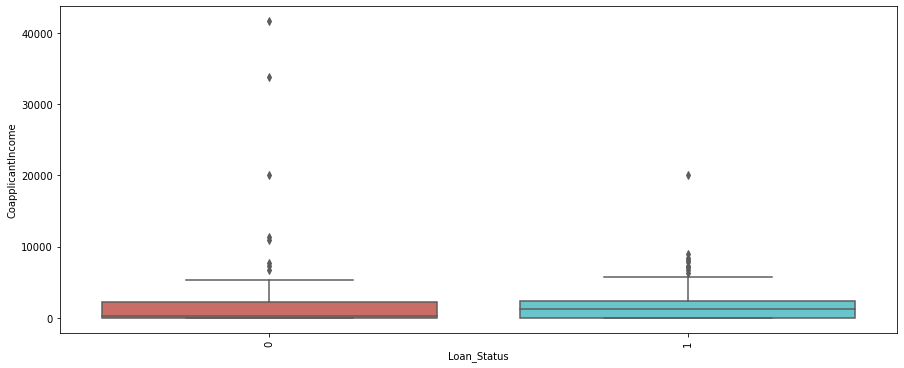

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=loan_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x432 with 0 Axes>

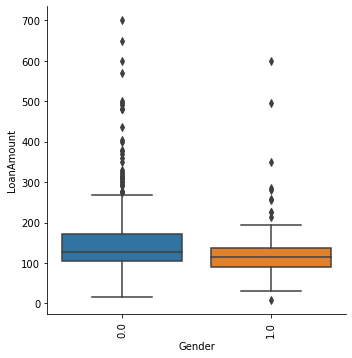

In [28]:
plt.figure(figsize=(15,6))
sns.catplot(x = 'Gender', y = 'LoanAmount', data = loan_data, kind = 'box')
plt.xticks(rotation = 90)
plt.show()


## model building ##

In [29]:
X = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = loan_data.Loan_Status

In [30]:
X.shape, y.shape

((614, 5), (614,))

In [31]:

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,
random_state = 10)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

## Accuracy Test ##

In [33]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)


0.7967479674796748

In [34]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.8167006109979633